In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline


Using TensorFlow backend.


In [2]:
import sys
sys.executable

'/home/manish/anaconda2/bin/python'

In [74]:
train_df = pd.read_csv("data/mnist/train.csv")
test_df = pd.read_csv("data/mnist/test.csv")

In [75]:
df = pd.DataFrame(train_df)
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df_X = train_df.drop("label",axis =1)

In [6]:
X_train = train_df_X.values
X_test  = test_df.values
y_train = train_df["label"].values

X_train.shape

(42000, 784)

In [7]:
X_train_images = X_train.reshape(-1,28,28)
X_train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

3


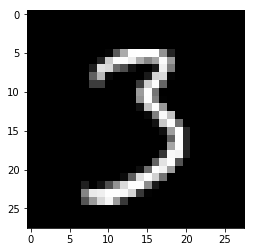

In [8]:
random_index = np.random.randint(0,len(y_train))

plt.imshow(X_train_images[random_index],cmap="gray")

print y_train[random_index]

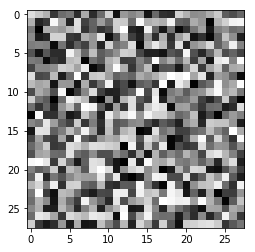

In [9]:
abc = np.random.randint(0,255,(28,28))

plt.imshow(abc, cmap="gray")

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [11]:
def create_model():
    
    m =Sequential()
    m.add(Dense(16,input_dim =784,activation="relu"))
    m.add(Dense(16,activation="relu"))
    m.add(Dense(10,activation="softmax"))
    
    return m

In [12]:
model = create_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=0.001),metrics=["acc"]) #categorical_crossentropy #mse

In [14]:
from keras.utils import np_utils

y_lh = np_utils.to_categorical(y_train)

y_lh

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [15]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [16]:
history = model.fit(X_train,y_lh, epochs=200,batch_size=200)

Epoch 1/200
42000/42000 [==============================] - 3s 83us/step - loss: 3.9602 - acc: 0.2360
Epoch 2/200
42000/42000 [==============================] - 2s 54us/step - loss: 1.8492 - acc: 0.3948
Epoch 3/200
42000/42000 [==============================] - 2s 56us/step - loss: 1.5477 - acc: 0.5202
Epoch 4/200
42000/42000 [==============================] - 2s 41us/step - loss: 1.3799 - acc: 0.5800
Epoch 5/200
42000/42000 [==============================] - 2s 40us/step - loss: 1.2816 - acc: 0.6213
Epoch 6/200
42000/42000 [==============================] - 2s 40us/step - loss: 1.2095 - acc: 0.6480
Epoch 7/200
42000/42000 [==============================] - 2s 41us/step - loss: 1.1525 - acc: 0.6703
Epoch 8/200
42000/42000 [==============================] - 2s 40us/step - loss: 1.1046 - acc: 0.6909
Epoch 9/200
42000/42000 [==============================] - 2s 40us/step - loss: 1.0659 - acc: 0.7038
Epoch 10/200
42000/42000 [==============================] - 2s 52us/step - loss: 1.0332 - a

42000/42000 [==============================] - 2s 46us/step - loss: 0.4039 - acc: 0.8861
Epoch 161/200
42000/42000 [==============================] - 2s 44us/step - loss: 0.4014 - acc: 0.8883
Epoch 162/200
42000/42000 [==============================] - 2s 44us/step - loss: 0.3999 - acc: 0.8882
Epoch 163/200
42000/42000 [==============================] - 2s 45us/step - loss: 0.3994 - acc: 0.8876
Epoch 164/200
42000/42000 [==============================] - 2s 47us/step - loss: 0.3976 - acc: 0.8878
Epoch 165/200
42000/42000 [==============================] - 2s 44us/step - loss: 0.3963 - acc: 0.8888
Epoch 166/200
42000/42000 [==============================] - 2s 48us/step - loss: 0.3957 - acc: 0.8896
Epoch 167/200
42000/42000 [==============================] - 2s 45us/step - loss: 0.3950 - acc: 0.8894
Epoch 168/200
42000/42000 [==============================] - 2s 42us/step - loss: 0.3931 - acc: 0.8895
Epoch 169/200
42000/42000 [==============================] - 2s 47us/step - loss: 0.392

In [17]:
def  vis(h):
    
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

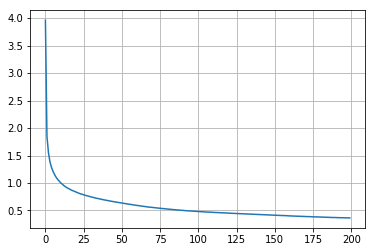

In [18]:
vis(history)

In [19]:


predictions = model.predict(X_test)

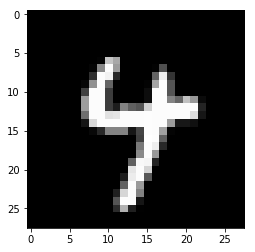

In [20]:
test_X_image = X_test.reshape(-1,28,28)

random_index = np.random.randint(0,len(X_test))

plt.imshow(test_X_image[random_index],cmap="gray")

In [21]:
print np.arange(10)

print predictions[random_index]

[0 1 2 3 4 5 6 7 8 9]
[  0.00000000e+00   2.40439021e-17   1.98944726e-05   6.71773392e-09
   9.96660948e-01   0.00000000e+00   2.72150118e-07   1.74572847e-07
   5.14375098e-10   3.31863575e-03]


In [48]:
output = np.round(model.predict(X_test),3)

output.shape


(28000, 10)

In [80]:
# create series 1 to 28,000
imageid = pd.Series(range(1,len(output)+1))

# output predicted image label
predictions_test = [np.argmax(out) for out in output]

In [85]:

# create dataframe to hold id and predicted label
df_output = pd.DataFrame({"ImageId":imageid,"Label":predictions_test})

df_output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3


In [86]:
df_output.to_csv('data/mnist/predictions.csv',index=False)